In [41]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import json

#Bibliotecas para visualização de resultados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Importando bibliotecas para transformação 
import inflection

#print(inflection.__version__)
#pip list

In [42]:
#Dicionário com lista das moedas de cada país, sigla da moeda e fator de conversão para o dólar dos EUA (fonte para conversão: https://www.bcb.gov.br/conversao)
moedas = pd.DataFrame({'Australia': ['dolar_australiano', 'AUD', '0.6226'],
          'Brazil': ['real', 'BRL', '0.1707'], 
          'Canada': ['dolar_canadiano', 'CAD', '0.6922'], 
          'England': ['libra_esterlina', 'GBP', '1.2432'],
          'India': ['rupia_indiana', 'INR', '0.0115'], 
          'Indonesia': ['rupia_indonesia', 'IDR', '0.0001'],
          'New Zeland': ['dolar_zelandes', 'NZD', '0.5651'],
          'Philippines': ['peso_filipino', 'PHP', '0.0171'], 
          'Qatar': ['ria_catarense', 'QAR', '0.2743'],
          'Singapure': ['dolar_singapura', 'SGD', '0.7409'], 
          'South Africa': ['rand_sul_africano', 'ZAR', '0.0537'],
          'Sri Lanka': ['rupia_sri_lanka', 'LKR', '0.0034'],
          'Turkey': ['lira_turca', 'TRY', '0.0279'], 
          'United Arab Emirates': ['dirame', 'AED', '0.2722'], 
          'United States of America': ['dolar', 'USD', '1']}, index = ['moeda', 'sigla', 'fator_conversao']).T.reset_index()
moedas.columns = ['country', 'moeda', 'siga', 'fator_conversao'] 

In [43]:
#Carregar arquivo csv
path = '../dataset/raw/'
df = pd.read_csv(path + 'zomato.csv')
df1 = df.copy()

#Transformação dos nomes das colunas
title = lambda x: inflection.titleize(x)
snakecase = lambda x: inflection.underscore(x)
spaces = lambda x: x.replace(" ", "")
cols_old = list(df1.columns)
cols_old = list(map(title, cols_old))
cols_old = list(map(spaces, cols_old))
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

#Identificando linhas com dados faltantes - apenas a coluna 'cuisines' tem dados faltantes (15)
#df1_summary = df1.info()
df1_faltantes  = df1.loc[df1['cuisines'].isna() == True, :].reset_index() #15 linhas com dados faltantes na coluna 'cuisines'
df1_faltantes.to_csv('../dataset/df1_faltantes.csv')

#Criando nova coluna com o nome dos países com base nos códigos
df1['country'] = df1['country_code'].apply(lambda code: 'India' if code == 1
                                                      else 'Australia' if code == 14
                                                      else 'Brazil' if code == 30
                                                      else 'Canada' if code == 37
                                                      else 'Indonesia' if code == 94
                                                      else 'New Zeland' if code == 148
                                                      else 'Philippines' if code == 162
                                                      else 'Qatar' if code == 166
                                                      else 'Singapure' if code == 184
                                                      else 'South Africa' if code == 189
                                                      else 'Sri Lanka' if code == 191
                                                      else 'Turkey' if code == 208
                                                      else 'United Arab Emirates' if code == 214
                                                      else 'England' if code == 215
                                                      else 'United States of America')

#Crianco a coluna para classificação dos país conforme a renda nacional bruta per capita (GNI - Fonte: World Bank Atlas)
df1['country_classification'] = df1['country'].apply(lambda country: 'lower_middle_income' if country == 'India'
                                                                else 'lower_middle_income' if country == 'Philippines'
                                                                else 'upper_middle_income' if country == 'Brazil'
                                                                else 'upper_middle_income' if country == 'Indonesia'
                                                                else 'upper_middle_income' if country == 'Singapure'
                                                                else 'upper_middle_income' if country == 'South Africa'
                                                                else 'upper_middle_income' if country == 'Sri Lanka'
                                                                else 'upper_middle_income' if country == 'Turkey'
                                                                else 'high_income' if country == 'Australia'
                                                     else 'high_income' if country == 'Canada'
                                                     else 'high_income' if country == 'New Zeland'
                                                     else 'high_income' if country == 'Qatar'
                                                     else 'high_income' if country == 'United Arab Emirates'
                                                     else 'high_income' if country == 'England'
                                                     else 'high_income'
                                                    )
                                                                                   
#Padronizando o preço médio dos pratos para 2
df1['average_cost_for_two'] = df1['average_cost_for_two'].astype(np.float64)

for line in range(len(df1)):

    if df1.loc[line, 'country'] == 'Australia':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.6226
    
    elif df1.loc[line, 'country'] == 'Brazil':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.1707
    
    elif df1.loc[line, 'country'] == 'Canada':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.6922
    
    elif df1.loc[line, 'country'] == 'England':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 1.2432
    
    elif df1.loc[line, 'country'] == 'India':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0115
    
    elif df1.loc[line, 'country'] == 'Indonesia':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0001
    
    elif df1.loc[line, 'country'] == 'New Zeland':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.5651
    
    elif df1.loc[line, 'country'] == 'Philippines':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0171
    
    elif df1.loc[line, 'country'] == 'Qatar':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.2743
    
    elif df1.loc[line, 'country'] == 'Singapure':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.7409
    
    elif df1.loc[line, 'country'] == 'South Africa':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0537

    elif df1.loc[line, 'country'] == 'Sri Lanka':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0034
    
    elif df1.loc[line, 'country'] == 'Turkey':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.0279
    
    elif df1.loc[line, 'country'] == 'United Arab Emirates':

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 0.2722
    
    else:

        df1.loc[line, 'average_cost_for_two'] = df1.loc[line, 'average_cost_for_two'] * 1


#Criando nova coluna de classificação da comida conforme a coluna Price_Range
df1['price_type'] = df1['price_range'].apply(lambda price_range: 'cheap' if price_range == 1 
                                                                         else 'normal' if price_range == 2 
                                                                         else 'expensive' if price_range == 3 
                                                                         else 'gourmet' 
                                             )
#Criando nova coluna de classificação por cor conforme a coluna rating-color
df1['color'] = df1['rating_color'].apply(lambda code: 'darkgreen' if code == '3F7E00'
                                                                  else 'green' if code == '5BA829'
                                                                  else 'lightgreen' if code == '9ACD32'
                                                                  else 'orange' if code == 'CDD614'
                                                                  else 'red' if code == 'FFBA00'
                                                                  else 'darkred' if code == 'CBCBC8'
                                                                  else 'darkred')

#Recuperando primeiro elemento de strings na coluna cousine
df1['cuisines'] = df1.loc[df1['cuisines'].isnull() == False, 'cuisines'].apply(lambda x: x.split(', ')[0])

#Removendo cadastros duplicados de restaurantes
df1_duplicados = pd.DataFrame(df1.duplicated(subset = ['restaurant_id']))
df1_duplicados.columns = ['ID_Duplicado']
qtd_ids_duplicados = len(list(df1_duplicados.loc[df1_duplicados['ID_Duplicado'] == True, :].index))
df1 = df1.drop_duplicates(subset = 'restaurant_id', keep = 'first').reset_index(drop=True)

df1.to_csv('../dataset/processed/dataset.csv', index = False)

## Geral

#### 1) Quantos restaurantes únicos estão registrados?

In [44]:
qtd_restaurantes_unicos = df1['restaurant_id'].nunique()

print(f'{qtd_restaurantes_unicos} restaurantes únicos')

6942 restaurantes únicos


#### 2) Quantos países únicos estão registrados?

In [45]:
qtd_paises_unicos = df1['country'].nunique()

print(f'{qtd_paises_unicos} países registrados')

15 países registrados


In [46]:
df1['country'].unique()

array(['Philippines', 'Brazil', 'Australia', 'United States of America',
       'Canada', 'Singapure', 'United Arab Emirates', 'India',
       'Indonesia', 'New Zeland', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey'], dtype=object)

#### 3) Quantos cidades únicas estão registradas?

In [47]:
qtd_cidades_unicas = df1['city'].nunique()

print(f'{qtd_cidades_unicas} cidades registradas')

125 cidades registradas


#### 4) Qual o total de avaliações feitas?

In [48]:
total_avaliacoes = df1['votes'].sum()

print(f'{total_avaliacoes} avaliações dos restaurantes')

4195634 avaliações dos restaurantes


#### 5) Qual o total de tipos de culinárias registrados?

In [49]:
total_culinarias = df1['cuisines'].nunique() #Esta função não considera o nan na contagem
                                             #Após remoção das linhas duplicadas, a coluna 'cuisines' tem 13 células com dados faltantes
print(f'{total_culinarias} tipos distintos de culinárias')

165 tipos distintos de culinárias


## País

#### 1) Qual o nome do país que possui mais cidades registradas?

In [50]:
grupos_paises_cidades = df1[['city', 'country']].groupby('country')['city'].nunique().reset_index()
grupos_paises_cidades = grupos_paises_cidades.sort_values('city', ascending=False)
paises_classificacao = df1[['country', 'country_classification']].groupby('country').first().reset_index()

paises_classificacao = grupos_paises_cidades.merge(paises_classificacao, how = 'inner', on = 'country')


print(f'{grupos_paises_cidades.iloc[0, 0]} - {grupos_paises_cidades.iloc[0, 1]} cidades cadastradas')

India - 49 cidades cadastradas


In [51]:
paises_classificacao

,country,city,country_classification
0,India,49,lower_middle_income
1,United States of America,22,high_income
2,Philippines,12,lower_middle_income
3,South Africa,12,upper_middle_income
4,England,5,high_income
5,United Arab Emirates,4,high_income
6,New Zeland,4,high_income
7,Indonesia,3,upper_middle_income
8,Australia,3,high_income
9,Brazil,3,upper_middle_income


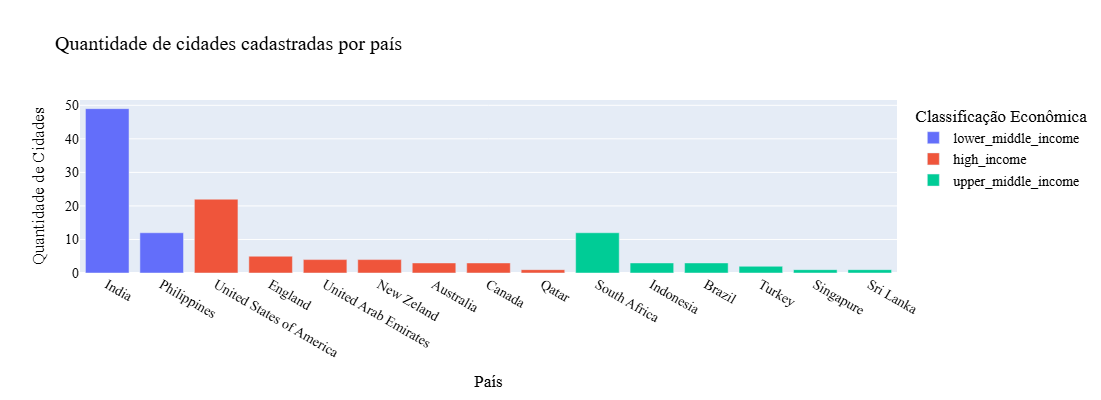

In [53]:
fig2 = px.bar(paises_classificacao, x = 'country', y = 'city', color = 'country_classification', 
              width = 800, height = 400, 
              title = 'Quantidade de cidades cadastradas por país')


fig2.update_layout(
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black"
)

fig2.update_layout(
    xaxis=dict(
        title=dict(
            text="País"
        )
    ),
    yaxis=dict(
        title=dict(
            text= 'Quantidade de Cidades'
        )
    ),
    legend=dict(
        title=dict(
            text="Classificação Econômica"
        )
    ),
    font=dict(
        family="Times New Roman, monospace",
        size=14,
        color="black"
    )
)
fig2

#### 2) Qual o nome do país que possui mais restaurantes registrados?

In [54]:
grupos_paises_restaurantes = df1[['country', 'restaurant_id']].groupby('country').count().sort_values('restaurant_id', ascending=False).reset_index()
paises_classificacao = df1[['country', 'country_classification']].groupby('country').first().reset_index()
restaurantes_classificacao = grupos_paises_restaurantes.merge(paises_classificacao, how = 'inner', on = 'country')

print(f'{grupos_paises_restaurantes.iloc[0,0]} - país com maior quantidade ({grupos_paises_restaurantes.iloc[0,1]}) de restaurantes registrados')

India - país com maior quantidade (3120) de restaurantes registrados


In [55]:
restaurantes_classificacao

,country,restaurant_id,country_classification
0,India,3120,lower_middle_income
1,United States of America,1378,high_income
2,England,400,high_income
3,South Africa,346,upper_middle_income
4,United Arab Emirates,300,high_income
5,Brazil,240,upper_middle_income
6,New Zeland,239,high_income
7,Australia,180,high_income
8,Canada,180,high_income
9,Turkey,159,upper_middle_income


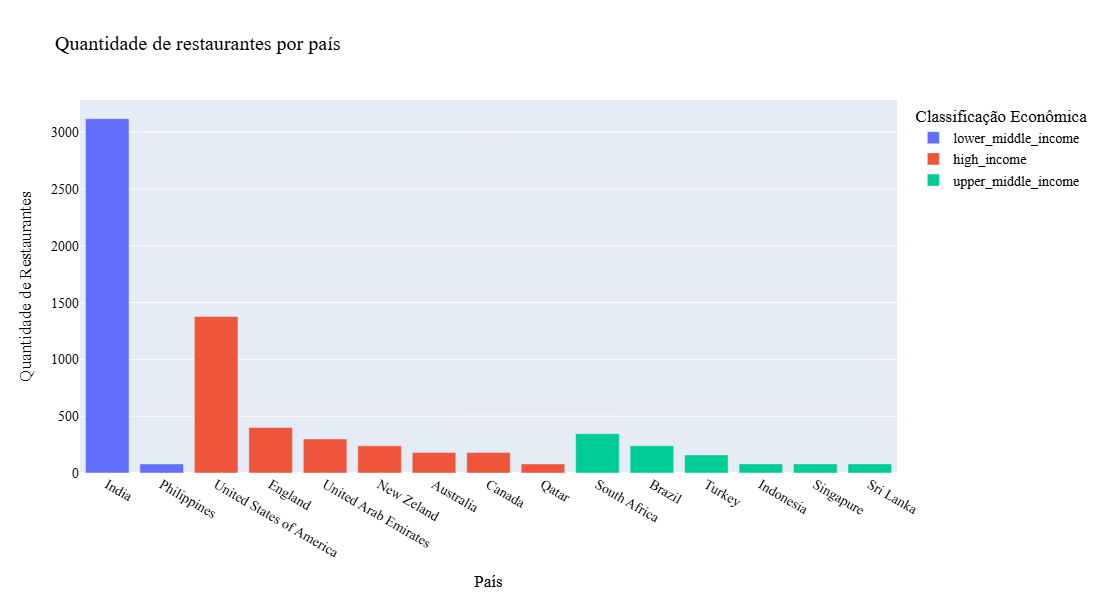

In [56]:
fig1 = px.bar(restaurantes_classificacao, x = 'country', y = 'restaurant_id', color = 'country_classification', width = 800, height = 600,
      title = 'Quantidade de restaurantes por país')

fig1.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black"
)

fig1.update_layout(
    xaxis=dict(
        title=dict(
            text="País"
        )
    ),
    yaxis=dict(
        title=dict(
            text= 'Quantidade de Restaurantes'
        )
    ),
    legend=dict(
        title=dict(
            text="Classificação Econômica"
        )
    ),
    font=dict(
        family="Times New Roman, monospace",
        size=14,
        color="black"
    )
)

#### 3) Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [57]:
qtd_paises_4 = df1.loc[df1['price_range'] == 4, ['price_range', 'country']].groupby('country').count().sort_values('price_range', ascending=False).reset_index()

print(f'{qtd_paises_4.iloc[0,0]} - país com maior quantidade {qtd_paises_4.iloc[0,1]} de restaurantes com nível de preço 4')

United States of America - país com maior quantidade 417 de restaurantes com nível de preço 4


#### 4) Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [58]:
qtd_paises_culinaria = df1[['country', 'cuisines']].groupby(['country'])[['cuisines']].nunique().sort_values('cuisines', ascending=False).reset_index()

print(f'{qtd_paises_culinaria.iloc[0,0]} - país com a maior quantidade ({qtd_paises_culinaria.iloc[0,1]}) de tipos culinários distintos')

India - país com a maior quantidade (77) de tipos culinários distintos


#### 5) Qual o nome do país que possui a maior quantidade de avaliações feitas?

In [59]:
qtd_pais_avaliacoes = df1[['country', 'votes']].groupby('country').sum().sort_values('votes', ascending = False).reset_index()

print(f'{qtd_pais_avaliacoes.iloc[0,0]} - país com maior quantidade de avaliações {qtd_pais_avaliacoes.iloc[0,1]}')

India - país com maior quantidade de avaliações 2800199


#### 6) Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [60]:
qtd_paises_entregas = df1.loc[df1['has_online_delivery'] == 1, ['country', 'restaurant_id']].groupby('country').count().sort_values('restaurant_id', ascending = False).reset_index()

print(f'{qtd_paises_entregas.iloc[0,0]} - país com maior quantidade ({qtd_paises_entregas.iloc[0,1]}) de restaurantes que fazem entrega')

India - país com maior quantidade (2177) de restaurantes que fazem entrega


#### 7) Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [61]:
qtd_paises_reserva = df1.loc[df1['has_table_booking'] == 1, ['country', 'has_table_booking']].groupby('country').count().sort_values('has_table_booking', ascending=False).reset_index()

print(f'{qtd_paises_reserva.iloc[0,0]} - países com maior quantidade ({qtd_paises_reserva.iloc[0,1]}) de restaurantes que aceitam reservas')

India - países com maior quantidade (256) de restaurantes que aceitam reservas


#### 8) Qual o nome do país que possui, **na média**, a maior quantidade de avaliações registradas?

In [62]:
qtd_paises_avaliacoes_media = df1[['country', 'votes']].groupby('country').mean().sort_values('votes', ascending=False).reset_index()

print(f'{qtd_paises_avaliacoes_media.iloc[0,0]} - país com maior quantidade ({qtd_paises_avaliacoes_media.iloc[0,1]}) de avaliações médias')

Indonesia - país com maior quantidade (1112.825) de avaliações médias


#### 9) Qual o nome do país que possui, na média, a maior nota média registrada?

In [63]:
pais_nota_media_alta = df1[['country', 'aggregate_rating']].groupby('country').mean().round(decimals=2).sort_values('aggregate_rating', ascending=False).reset_index()

print(f'{pais_nota_media_alta.iloc[0,0]} - país com nota média mais alta ({pais_nota_media_alta.iloc[0,1]})')

Indonesia - país com nota média mais alta (4.6)


#### 10) Qual o nome do país que possui, na média, a menor nota média registrada?

In [64]:
pais_nota_media_baixa = df1[['country', 'aggregate_rating']].groupby('country').mean().round(decimals=2).sort_values('aggregate_rating', ascending=True).reset_index()

print(f'{pais_nota_media_baixa.iloc[0,0]} - país com nota média mais baixa ({pais_nota_media_baixa.iloc[0,1]})')

Brazil - país com nota média mais baixa (3.32)


#### 11) Qual a média/mediana de preço de um prato para dois por país?

In [65]:
#Ordenando as linhas pela classificação dos países conforme suas rendas brutas - pelo indicador GNI
df1_aux1 = df1.loc[(df1['average_cost_for_two'] > 0)&(df1['average_cost_for_two'] != 15565010.5842), ['country', 'country_classification', 'average_cost_for_two']]
#Na coluna 'average_cost_for_two', existem 52 valores iguais a 0. Esse valores foram removidos antes do cálculo da média
country_classification = df1_aux1[['country', 'country_classification']].drop_duplicates()

categories = list(df1['country_classification'].unique())
df1_aux1['country_classification'] = pd.Categorical(df1_aux1['country_classification'], categories = categories, ordered = True)
df1_aux1 = df1_aux1.sort_values('country_classification')

#Calculando a média e mediana de preço dos pratos para 2
media_preco_prato_2 = df1_aux1[['country', 'average_cost_for_two']].groupby('country').mean().round(decimals=2).sort_values('average_cost_for_two', ascending=True).reset_index()
mediana_preco_prato_2 = df1_aux1[['country', 'average_cost_for_two']].groupby('country').median().round(decimals=2).sort_values('average_cost_for_two', ascending=True).reset_index()
med_preco_prato_2 = media_preco_prato_2.merge(mediana_preco_prato_2, how = 'inner', on = 'country')
med_preco_prato_2.columns = ['country', 'mean', 'median']
med_preco_prato_2 = med_preco_prato_2.merge(country_classification, how = 'inner', on = 'country')
med_preco_prato_2 = med_preco_prato_2.sort_values('median', ascending=True)
med_preco_prato_2['country_classification'] = pd.Categorical(med_preco_prato_2['country_classification'], categories = categories, ordered = True)
med_preco_prato_2 = med_preco_prato_2.sort_values('country_classification')

In [66]:
med_preco_prato_2

,country,mean,median,country_classification
1,India,8.11,6.90,lower_middle_income
4,Philippines,21.00,20.52,lower_middle_income
0,Turkey,3.59,2.51,upper_middle_income
2,Sri Lanka,8.88,8.50,upper_middle_income
3,South Africa,18.48,16.11,upper_middle_income
5,Brazil,24.30,20.48,upper_middle_income
7,Indonesia,30.30,27.50,upper_middle_income
14,Singapure,104.79,74.09,upper_middle_income
6,Canada,29.47,27.69,high_income
8,New Zeland,35.72,31.08,high_income


#### Visualiação de dados da pergunta 11. 
#### O preço dos pratos aumenta com a renda nacional média? Hipótese inicial: Sim.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5004\3149673923.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5004\3149673923.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'lower_middle'), Text(1, 0, 'upper_middle'), Text(2, 0, 'high')]

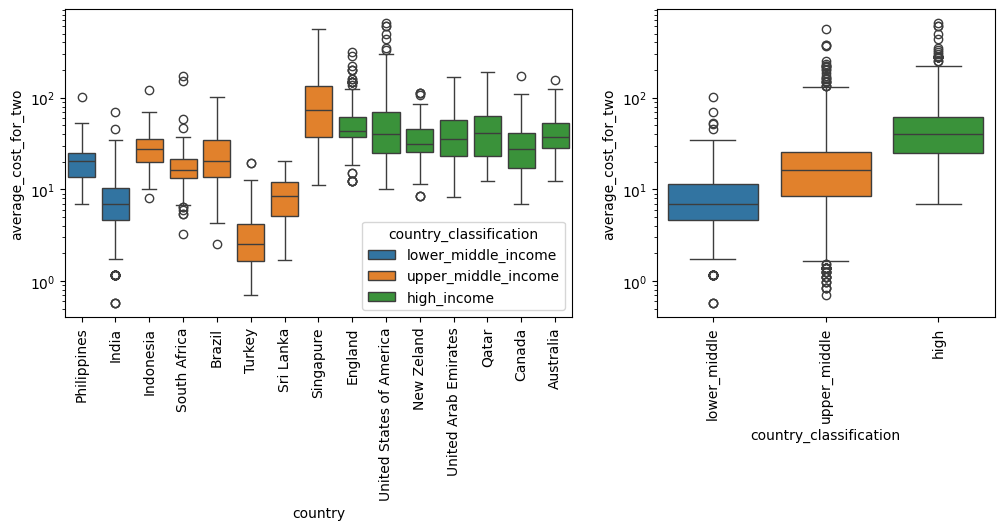

In [67]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4), gridspec_kw = dict(width_ratios = [6, 4]))
sns.boxplot(data = df1_aux1, x = df1_aux1['country'], y = df1_aux1['average_cost_for_two'], hue = df1_aux1['country_classification'], log_scale = True, orient = 'v', ax = axs[0])
axs[0].set_xticklabels(labels = ['Philippines', 'India', 'Indonesia', 'South Africa', 'Brazil', 'Turkey', 'Sri Lanka', 'Singapure', 'England',
                                 'United States of America', 'New Zeland', 'United Arab Emirates', 'Qatar', 'Canada', 'Australia'], rotation=90)
sns.boxplot(data = df1_aux1, x = df1_aux1['country_classification'], y = df1_aux1['average_cost_for_two'], hue = df1_aux1['country_classification'], log_scale = True, orient = 'v', ax = axs[1])
axs[1].set_xticklabels(labels = ['lower_middle', 'upper_middle', 'high'], rotation = 90)

## Cidade

#### 1) Quais os nomes das cidades que possuem mais restaurantes registrados?

In [68]:
contagem_cidades = df1[['city', 'country', 'restaurant_id', ]].groupby(['city', 'country']).count().sort_values('restaurant_id', ascending=False).reset_index()
contagem_cidades.columns = ['City', 'Country', 'Quantity', ]
contagem_cidades2 = contagem_cidades.loc[contagem_cidades['Quantity'] == 80, :].copy()
categories = contagem_cidades2[['City', 'Country']].groupby('Country').count().sort_values('City', ascending=False).reset_index()
categories = list(categories['Country'].unique())
contagem_cidades2['Country'] = pd.Categorical(contagem_cidades2['Country'], categories = categories, ordered=True)
contagem_cidades2 = contagem_cidades2.sort_values('Country').reset_index(drop=True)

print(f'Lista de cidades ({contagem_cidades2.shape[0]}) com a maior quantidade ({contagem_cidades2.iloc[0,2]}) de restaurantes - {contagem_cidades2['City'].unique()}')

Lista de cidades (55) com a maior quantidade (80) de restaurantes - ['Nagpur' 'Guwahati' 'Mangalore' 'Dehradun' 'Kanpur' 'Indore' 'Jaipur'
 'Ranchi' 'Gangtok' 'Pune' 'Ooty' 'Patna' 'Mysore' 'Surat' 'Vadodara'
 'Vizag' 'Varanasi' 'Shimla' 'Kochi' 'Goa' 'Puducherry' 'Agra' 'Chennai'
 'Allahabad' 'Lucknow' 'Amritsar' 'Bangalore' 'Bhopal' 'Ludhiana'
 'Coimbatore' 'Bhubaneshwar' 'Aurangabad' 'Kolkata' 'Glasgow' 'Manchester'
 'Edinburgh' 'London' 'Birmingham' 'Brasília' 'São Paulo' 'Rio de Janeiro'
 'Cape Town' 'Durban' 'Pretoria' 'Houston' 'Austin' 'Dallas' 'Abu Dhabi'
 'Sharjah' 'Dubai' 'Hamilton' 'Singapore' 'Doha' 'Ankara' 'Colombo']


In [69]:
contagem_cidades2

,City,Country,Quantity
0,Nagpur,India,80
1,Guwahati,India,80
2,Mangalore,India,80
3,Dehradun,India,80
4,Kanpur,India,80
5,Indore,India,80
6,Jaipur,India,80
7,Ranchi,India,80
8,Gangtok,India,80
9,Pune,India,80


#### Visualiação de dados da pergunta 01. 

##### Cidades com mais restaurantes (80) na base

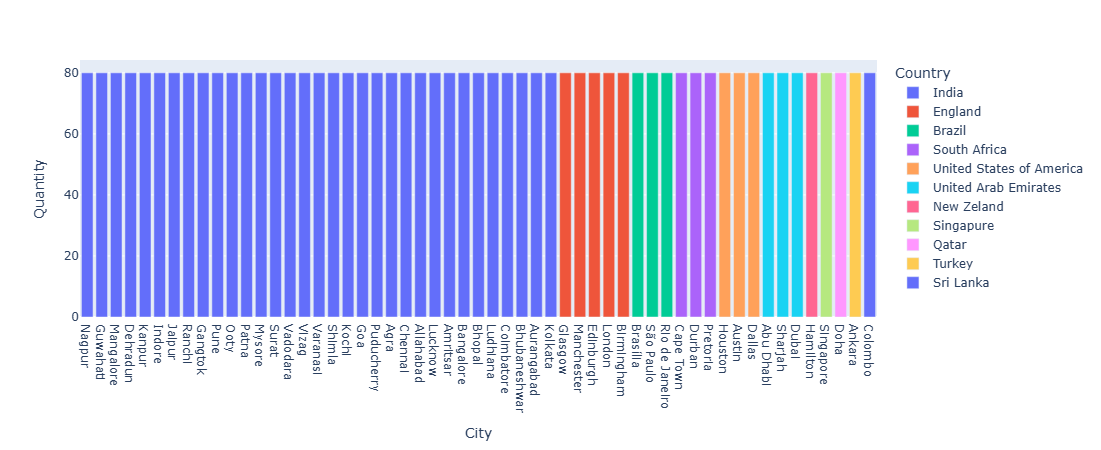

In [70]:
fig3 = px.bar(contagem_cidades2, x = 'City', y = 'Quantity', color = 'Country', height = 450)

fig3

#### 2) Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [71]:
grupos_cidade_restaurantes_nota_4 = df1.loc[df1['aggregate_rating'] > 4, ['city', 'restaurant_id']].groupby(['city']).count().sort_values('restaurant_id', ascending=False).reset_index()

print(f'Cidade com maior quantidade ({grupos_cidade_restaurantes_nota_4.iloc[0,1]}) de restaurantes com nota média maior que 4 - {grupos_cidade_restaurantes_nota_4.iloc[0,0]}')

Cidade com maior quantidade (79) de restaurantes com nota média maior que 4 - Bangalore


#### 3) Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [72]:
cidade_nota_25 = df1.loc[df1['aggregate_rating'] < 2.5, ['city', 'aggregate_rating', 'restaurant_id']].sort_values('aggregate_rating', ascending=True).reset_index(drop=True)
grupo_cidade_nota_25 = cidade_nota_25.groupby(['city', 'aggregate_rating']).count().sort_values(['restaurant_id'], ascending=False).reset_index()


print(f'Cidade com maior quantidade ({grupo_cidade_nota_25.iloc[0,2]}) de restaurantes com nota abaixo de 2.5 - {grupo_cidade_nota_25.iloc[0,0]}')

Cidade com maior quantidade (40) de restaurantes com nota abaixo de 2.5 - Gangtok


#### 4) Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [73]:
cidade_valor_medio_prato = df1.loc[df1['average_cost_for_two'] != 15565010.5842, ['city', 'average_cost_for_two']].groupby('city').mean().round(decimals=2).sort_values('average_cost_for_two', ascending=False).reset_index()

print(f'Cidade com preço médio ({cidade_valor_medio_prato.iloc[0,1]}) mais alto do prato para 2 - {cidade_valor_medio_prato.iloc[0,0]}')

Cidade com preço médio (104.79) mais alto do prato para 2 - Singapore


#### 5) Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintos?

In [74]:
cidade_culinarias_distintas = df1[['city', 'country', 'cuisines']].groupby(['city', 'country']).nunique().sort_values('cuisines', ascending=False).reset_index()
cidade_culinarias_distintas = cidade_culinarias_distintas.head(10)

#### Visualização de dados da pergunta 05

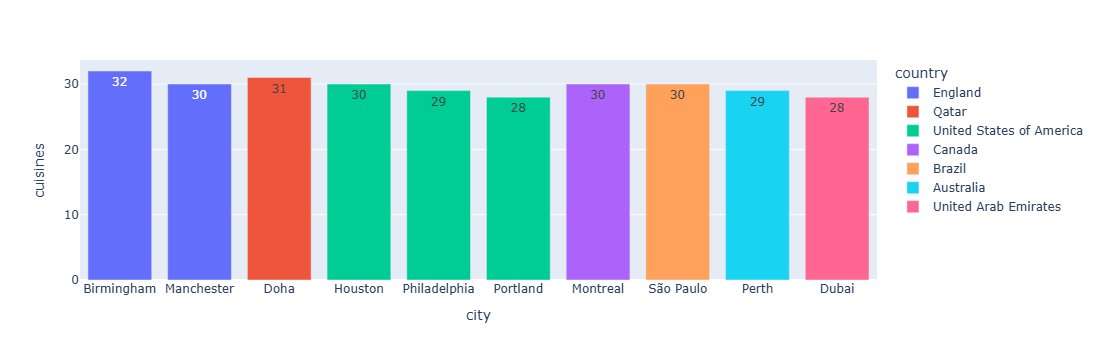

In [75]:
#Cidades (10) com maior diversisdade de tipos culinários

fig3 = px.bar(cidade_culinarias_distintas, x = 'city', y = 'cuisines', color = 'country', text = 'cuisines', width = 800)

fig3

#### 06) Qual o nome da cidade com a maior quantidade de restaurantes que fazem reserva?

##### Premissa (coluna 'has_table_booking'): 1 - Sim | 0 - Não

In [76]:
cidade_restaurantes_reserva = df1.loc[df1['has_table_booking'] == 1, ['city', 'country', 'has_table_booking']].groupby(['city', 'country']).count().sort_values('has_table_booking', ascending=False).reset_index()
categories = list(cidade_restaurantes_reserva['country'].unique())
cidade_restaurantes_reserva['country'] = pd.Categorical(cidade_restaurantes_reserva['country'], categories = categories, ordered = True)
cidade_restaurantes_reserva = cidade_restaurantes_reserva.sort_values('country').reset_index(drop=True)

cidade_restaurantes_reserva_2 = cidade_restaurantes_reserva.groupby('country').first().reset_index()

print(f'Cidade com maior quantidade ({cidade_restaurantes_reserva.iloc[0,2]}) de restaurantes que fazem reservas - {cidade_restaurantes_reserva.iloc[0,0]}')

Cidade com maior quantidade (42) de restaurantes que fazem reservas - Bangalore


C:\Users\Bruno\AppData\Local\Temp\ipykernel_5004\1747781890.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Visualização de dados da pergunta 06

##### Primeira Cidade de cada país com maior quantidade de restaurantes que fazem reservas

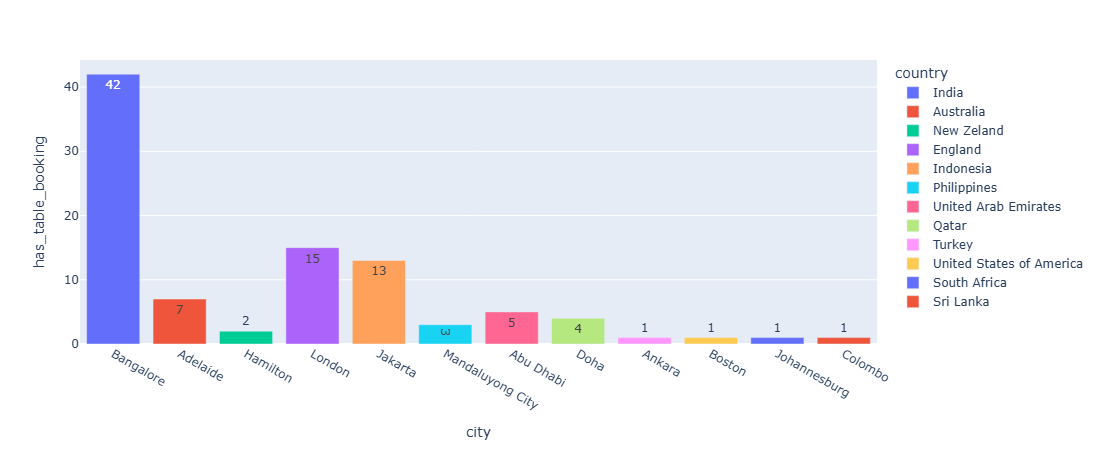

In [77]:
fig4 = px.bar(cidade_restaurantes_reserva_2, x = 'city', y = 'has_table_booking', color = 'country', text = 'has_table_booking', height = 450)

fig4

#### 07) Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

##### Premissa (coluna 'has_online_delivery'): 1 - Sim | 0 - Não

In [78]:
cidade_restaurantes_entregas = df1.loc[df1['is_delivering_now'] == 1, ['city', 'country', 'is_delivering_now']].groupby(['city', 'country']).count().sort_values('is_delivering_now', ascending=False).reset_index()
categories = list(cidade_restaurantes_entregas['country'].unique())
cidade_restaurantes_entregas['country'] = pd.Categorical(cidade_restaurantes_entregas['country'], categories = categories, ordered = True)
cidade_restaurantes_entregas = cidade_restaurantes_entregas.sort_values('country').reset_index(drop=True)
cidade_restaurantes_entregas_2 = cidade_restaurantes_entregas.groupby('country').first().reset_index()

print(f'Cidade com maior quantidade ({cidade_restaurantes_entregas.iloc[0,2]}) de restaurantes que fazem entregas - {cidade_restaurantes_entregas.iloc[0,0]}')

Cidade com maior quantidade (48) de restaurantes que fazem entregas - Amritsar


C:\Users\Bruno\AppData\Local\Temp\ipykernel_5004\3648494446.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Visualização de dados da pergunta 07

##### Primeira Cidade de cada país com maior quantidade de restaurantes que fazem entregas

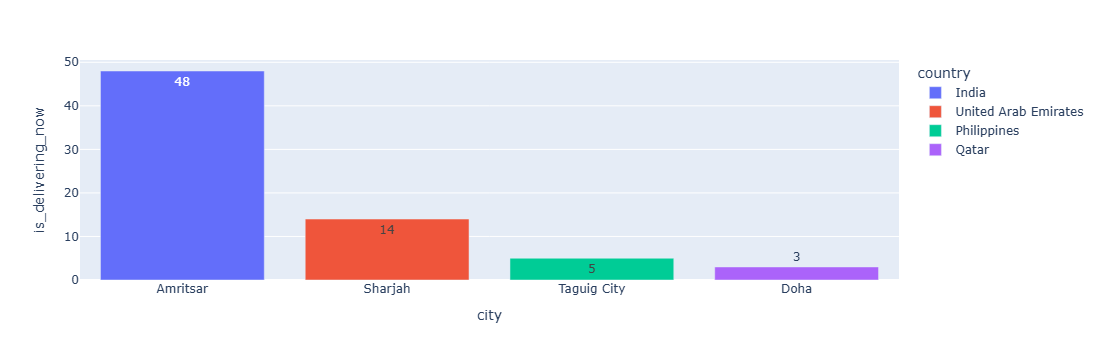

In [79]:
fig5 = px.bar(cidade_restaurantes_entregas_2, x = 'city', y = 'is_delivering_now', color = 'country', text = 'is_delivering_now')

fig5

#### 08) Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

##### Premissa (coluna 'has_online_delivery'): 1 - Sim | 0 - Não

In [80]:
cidades_pedidos_online = df1.loc[df1['has_online_delivery'] == 1, ['city', 'country', 'has_online_delivery']].groupby(['city', 'country']).count().sort_values('has_online_delivery', ascending=False).reset_index()
categories = list(cidades_pedidos_online['country'].unique())
cidades_pedidos_online['country'] = pd.Categorical(cidades_pedidos_online['country'], categories = categories, ordered = True)
cidades_pedidos_online = cidades_pedidos_online.sort_values('country').reset_index(drop=True)

cidades_pedidos_online_2 = cidades_pedidos_online.groupby('country').first().reset_index()

print(f'Cidade com maior quantidade ({cidades_pedidos_online.iloc[0,2]}) de restaurantes que aceitam pedidos online - {cidades_pedidos_online.iloc[0,0]}')

Cidade com maior quantidade (75) de restaurantes que aceitam pedidos online - Bhopal


C:\Users\Bruno\AppData\Local\Temp\ipykernel_5004\4266616963.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



##### Primeira Cidade de cada país com maior quantidade de restaurantes que aceitam pedidos online

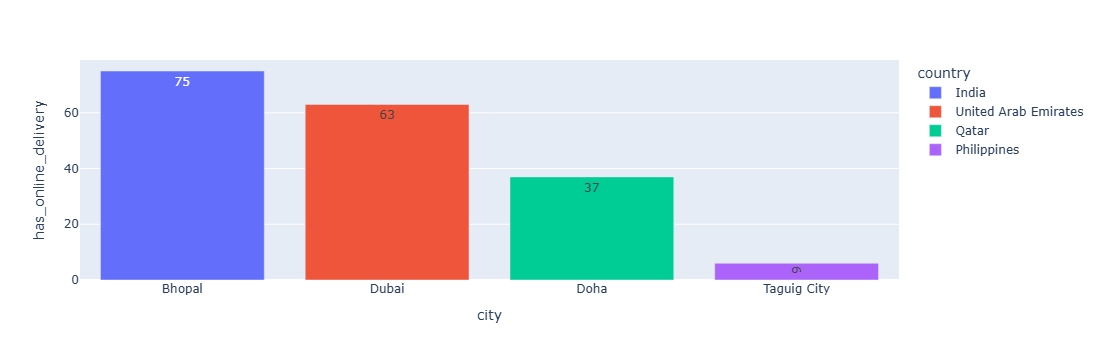

In [81]:
fig6 = px.bar(cidades_pedidos_online_2, x = 'city', y = 'has_online_delivery', color = 'country', text = 'has_online_delivery')

fig6

## Restaurantes 

#### 01) Qual o nome do restaurante com a maior quantidade de avaliações?

In [82]:
restaurante_avaliado = df1[['restaurant_name', 'votes', 'city', 'country']].sort_values('votes', ascending=False)

print(f'Restaurante com maior quantidade ({restaurante_avaliado.iloc[0,1]}) de avaliações - Nome: {restaurante_avaliado.iloc[0,0]}')

Restaurante com maior quantidade (41333) de avaliações - Nome: Bawarchi


#### 02) Qual o nome do restaurante com a maior nota média?

In [83]:
restaurante_nota = df1[['restaurant_name', 'aggregate_rating', 'city', 'country']].sort_values('aggregate_rating', ascending=False)
 
restaurante_nota_maxima = restaurante_nota.loc[restaurante_nota['aggregate_rating'] == restaurante_nota['aggregate_rating'].max(), :]

print(f'Restaurantes com nota máxima ({restaurante_nota['aggregate_rating'].max()}) - Quantidade: {restaurante_nota_maxima['restaurant_name'].nunique()} restaurantes')

Restaurantes com nota máxima (4.9) - Quantidade: 214 restaurantes


#### 03) Qual o nome do restaurante com maior valor de um prato para dois?

In [84]:
restaurante_prato_mais_caro = df1[['restaurant_name', 'average_cost_for_two', 'city', 'country']].sort_values('average_cost_for_two', ascending=False)

restaurante_prato_mais_caro = restaurante_prato_mais_caro.loc[restaurante_prato_mais_caro['average_cost_for_two'] == restaurante_prato_mais_caro['average_cost_for_two'].max(), :]

print(f'Nome do restaurante com preço mais caro: {restaurante_prato_mais_caro.iloc[0,0]}')

Nome do restaurante com preço mais caro: d'Arry's Verandah Restaurant


#### 04) Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [85]:
restaurante_culinaria_brasileira = df1.loc[(df1['cuisines'] == 'Brazilian')&(df1['aggregate_rating'] != 0.0), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending=True)

print(f'Restaurante com culinária brasileira com menor nota média de avaliação (!= 0) - {restaurante_culinaria_brasileira.iloc[0,0]}')

Restaurante com culinária brasileira com menor nota média de avaliação (!= 0) - Café das Estrelas


#### 05) Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [86]:
restaurante_brasileiro = df1.loc[(df1['cuisines'] == 'Brazilian')&(df1['country'] == 'Brazil'), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending=False)

print(f'Restaurante brasileiro mais bem avaliado - {restaurante_brasileiro.iloc[0,0]}')

Restaurante brasileiro mais bem avaliado - Braseiro da Gávea


#### 06) Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

##### Premissa (coluna 'has_online_delivery'): 1 - Sim | 0 - Não

In [87]:
restaurantes_comparacao = df1[['has_online_delivery', 'aggregate_rating', 'votes']].groupby('has_online_delivery').agg({'aggregate_rating': ['mean', 'std', 'median', 'count'], 'votes': 'sum'}).round(decimals =2).reset_index()

restaurantes_comparacao

has_online_delivery aggregate_rating                       votes
                                  mean   std median count      sum
0                   0             4.14  0.76    4.3  4514  2158975
1                   1             4.10  0.47    4.1  2428  2036659

In [88]:
print(f'Os restaurantes que não aceitam pedido online possuem quantidade de votos e avaliações ligeiramente maiores')

Os restaurantes que não aceitam pedido online possuem quantidade de votos e avaliações ligeiramente maiores


#### 07) Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

##### Premissa (coluna 'has_table_booking'): 1 - Sim | 0 - Não

In [89]:
restaurantes_reservas_preco = df1.loc[(df1['average_cost_for_two'] > 0)&(df1['average_cost_for_two'] != 15565010.5842), ['has_table_booking', 'average_cost_for_two']].groupby('has_table_booking').agg({'average_cost_for_two': ['mean', 'std', 'median', 'count']}).round(decimals=2).reset_index()

restaurantes_reservas_preco

has_table_booking average_cost_for_two                    
                                    mean    std median count
0                 0                26.91  36.44  15.00  6471
1                 1                29.22  32.54  17.25   418

In [90]:
print(f'Os restaurantes que aceitam reservas possuem valor médio/mediano do prato para dois mais alto')

Os restaurantes que aceitam reservas possuem valor médio/mediano do prato para dois mais alto


In [91]:
restaurantes_reservas_entrega = df1.loc[(df1['average_cost_for_two'] > 0)&(df1['average_cost_for_two'] != 15565010.5842), ['has_table_booking', 'has_online_delivery',  'average_cost_for_two']].groupby(['has_table_booking', 'has_online_delivery']).agg({'average_cost_for_two': ['mean', 'std', 'median', 'count']}).round(decimals=2).reset_index()

restaurantes_reservas_entrega

has_table_booking has_online_delivery average_cost_for_two                \
                                                        mean    std median   
0                 0                   0                36.17  41.74  25.00   
1                 0                   1                 9.85  10.80   5.75   
2                 1                   0                37.59  37.02  22.60   
3                 1                   1                14.42  12.96  11.50   

         
  count  
0  4194  
1  2277  
2   267  
3   151

#### 08) Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [92]:
restaurantes_eua = df1.loc[(df1['country'] == 'United States of America')&((df1['cuisines'] == 'BBQ')|(df1['cuisines'] == 'Japanese')), ['cuisines', 'average_cost_for_two']].groupby('cuisines').agg({'average_cost_for_two': ['mean', 'std', 'median']}).round(decimals=2).reset_index()

restaurantes_eua

cuisines average_cost_for_two              
                            mean    std median
0       BBQ                39.64  18.72   37.5
1  Japanese                56.41  44.87   55.0

In [93]:
print('Restaurantes americanos especializados em comida japonese tem preço médio de prato maior do que os restaurantes especializados em churrasco')

Restaurantes americanos especializados em comida japonese tem preço médio de prato maior do que os restaurantes especializados em churrasco


## Tipos de culinária

#### 01) Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [94]:
restaurantes_cozinha_italiana = df1.loc[(df1['cuisines'] == 'Italian')&(df1['aggregate_rating'] == 4.9), ['restaurant_name', 'aggregate_rating', 'country', 'restaurant_id']].sort_values('aggregate_rating', ascending=False)

restaurantes_cozinha_italiana.loc[restaurantes_cozinha_italiana['restaurant_id'] == restaurantes_cozinha_italiana['restaurant_id'].min()]

,restaurant_name,aggregate_rating,country,restaurant_id
5007,Darshan,4.9,India,10021


#### 02) Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [95]:
restaurante_cozinha_italiana_avaliacao = df1.loc[(df1['cuisines'] == 'Italian')&(df1['aggregate_rating'] != 0), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = True).reset_index()

restaurante_cozinha_italiana_avaliacao.iloc[0,1]

"Siena's"

#### 03) Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [96]:
restaurante_cozinha_americana_avaliacao_alta = df1.loc[(df1['cuisines'] == 'American')&(df1['aggregate_rating'] == 4.9), ['restaurant_name', 'aggregate_rating', 'restaurant_id']].sort_values('aggregate_rating', ascending = False).reset_index()

restaurante_cozinha_americana_avaliacao_alta.loc[restaurante_cozinha_americana_avaliacao_alta['restaurant_id'] == restaurante_cozinha_americana_avaliacao_alta['restaurant_id'].min(), :]

,index,restaurant_name,aggregate_rating,restaurant_id
23,6136,Burger & Lobster,4.9,6102616


#### 04) Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [97]:
restaurante_cozinha_americana_avaliacao_baixa = df1.loc[(df1['cuisines'] == 'American')&(df1['aggregate_rating'] != 0), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = True).reset_index()

restaurante_cozinha_americana_avaliacao_baixa.iloc[0,1]

"Guy Fieri's Kitchen & Bar"

#### 05) Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [98]:
restaurante_cozinha_arabe_avaliacao_alta = df1.loc[(df1['cuisines'] == 'Arabian')&(df1['aggregate_rating'] != 4.9), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = False).reset_index()

restaurante_cozinha_arabe_avaliacao_alta.iloc[0,1]

'Mandi@36'

#### 06) Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [99]:
restaurante_cozinha_arabe_avaliacao_baixa = df1.loc[(df1['cuisines'] == 'Arabian')&(df1['aggregate_rating'] != 0), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = True).reset_index()

restaurante_cozinha_arabe_avaliacao_baixa.iloc[0,1]

'Empório Árabe'

#### 07) Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [100]:
restaurantes_culinaria_japonesa_alta = df1.loc[(df1['cuisines'] == 'Japanese')&(df1['aggregate_rating'] == 4.9), ['restaurant_name', 'aggregate_rating', 'restaurant_id']].sort_values('aggregate_rating', ascending = False).reset_index()

restaurantes_culinaria_japonesa_alta.loc[restaurantes_culinaria_japonesa_alta['restaurant_id'] == restaurantes_culinaria_japonesa_alta['restaurant_id'].min(), :]

,index,restaurant_name,aggregate_rating,restaurant_id
15,6122,Sushi Samba,4.9,6107336


#### 08) Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [37]:
restaurantes_culinaria_japonesa_baixa = df1.loc[(df1['cuisines'] == 'Japanese')&(df1['aggregate_rating'] != 0), ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = True).reset_index()

restaurantes_culinaria_japonesa_baixa.iloc[0,1]

'Orienthai'

#### 09) Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [39]:
restaurantes_cozinha_caseira_alta = df1.loc[df1['cuisines'] == 'Home-made', ['restaurant_name', 'aggregate_rating']].sort_values('aggregate_rating', ascending = False).reset_index()

restaurantes_cozinha_caseira_alta.iloc[0,1]

'Kanaat Lokantası'

#### 10) Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [87]:
restaurantes_cozinha_caseira_baixa = df1.loc[df1['cuisines'] == 'Home-made', ['restaurant_name', 'aggregate_rating', 'restaurant_id']].sort_values('aggregate_rating', ascending = True).reset_index()

restaurantes_cozinha_caseira_baixa.iloc[0,1]

'GurMekan Restaurant'

#### 11) Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [26]:
valor_prato_culinaria = df1.loc[df1['average_cost_for_two'] != 15565010.5842, ['cuisines', 'average_cost_for_two']].sort_values('average_cost_for_two', ascending = False).reset_index()#groupby('cuisines').mean().round(decimals = 2).sort_values('average_cost_for_two', ascending = False).reset_index()

valor_prato_culinaria.loc[0]

index                           1422
cuisines                New American
average_cost_for_two           650.0
Name: 0, dtype: object

#### 12) Qual o tipo de culinária que possui a maior nota média?

In [79]:
valor_prato_culinaria_media = df1.loc[df1['average_cost_for_two'] != 15565010.5842, ['cuisines', 'aggregate_rating']].groupby('cuisines').mean().round(decimals = 2).sort_values('aggregate_rating', ascending = False).reset_index()

valor_prato_culinaria_media.iloc[1:4, :]

,cuisines,aggregate_rating
1,Ramen,4.8
2,Ottoman,4.8
3,Egyptian,4.8


#### 13) Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [85]:
restaurantes_culinaria_pedidos_entregas = df1.loc[(df1['has_online_delivery'] == 1)&(df1['is_delivering_now'] == 1), ['cuisines', 'restaurant_id']].groupby('cuisines').count().sort_values('restaurant_id', ascending=False).reset_index()

restaurantes_culinaria_pedidos_entregas.iloc[0,0]

'North Indian'